<a href="https://colab.research.google.com/github/parragajp/JPthehulk/blob/master/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import requried library
import pandas as pd

# import file from github
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [ ]:
# let's look at the numerical feature's summary
campaign.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
 # view all columns
campaign.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
# check if there is any NA's
campaign.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# View the first 5 rows
campaign.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# check how many rows and columns
campaign.shape

(41188, 20)

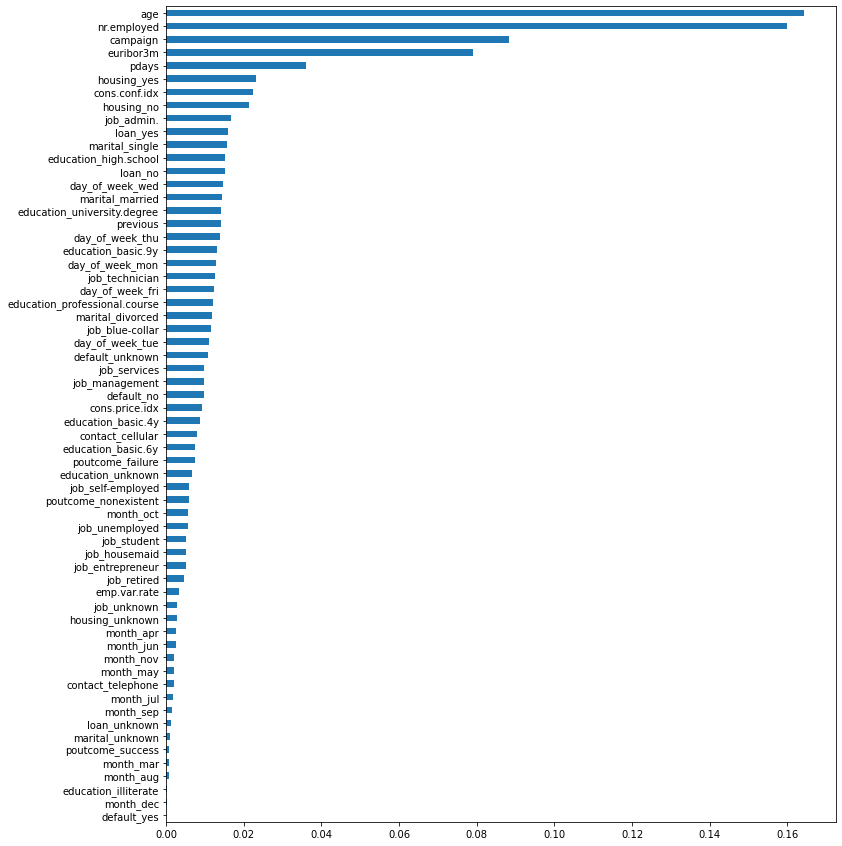

In [ ]:
# required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import altair as alt
from sklearn import tree

# first perform a decision tree on all columns
clf = tree.DecisionTreeClassifier()

# encode the categorical columns
campaign_copy = pd.get_dummies(campaign, columns =['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome'])

# These are the columns:
"""
Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')
"""

# pull out the features and target variable
X = campaign_copy.loc[:, ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']]
y = campaign_copy.y

# run model
clf = clf.fit(X, y)

# pull important features and then decide which ones to keep
coef = pd.Series(clf.feature_importances_, index = X.columns)
imp_coef = coef.sort_values()

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 15)
imp_coef.plot(kind = "barh")

In [ ]:
# begin configuring altair settings for clean graph at the end
def alt_avenir():
    font = "avenir"
    background_color = "#EEEEF8"
    font_color = "#444444"

    return {
        "config": {
            "view": {
                'width': 325,
                'height': 300
            },
            "background": background_color,
            "title": {
                'font': font,
                'fontSize': 20,
                'color': font_color
            },
            "axis": {
                "grid": False,
                'labelFontSize': 12,
                'titleFontSize': 11,
                "labelFont": font,
                "titleFont": font,
                'titleColor': font_color
            },
            "header": {
                "labelFont": font,
                "titleFont": font
            },
            "legend": {
                "labelFont": font,
                "titleFont": font,
                "fillColor": background_color,
                "padding": 10,
                "labelFontSize": 17,
                "titleFontSize": 17,
                "symbolStrokeWidth": 12
            }
        }
    }

# Altair settings
alt.themes.register('alt_avenir', alt_avenir)
alt.themes.enable('alt_avenir')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [ ]:
# train and test 'clf' to view accuracy score:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

clf_splitted = tree.DecisionTreeClassifier()
clf_splitted.fit(X_train, y_train)
test_predictions = clf_splitted.predict(X_test)
accuracy_score(y_test, test_predictions)

0.8360443473334952

In [ ]:
# let's explore the top 2 features see if accuracy score increases
X_top2 = campaign_copy.loc[:, ['age', 'nr.employed']]
y_top2 = campaign_copy.y
X_train, X_test, y_train, y_test = train_test_split(X_top2, y_top2, test_size=.3)
clf_splitted.fit(X_train, y_train)
test_predictions = clf_splitted.predict(X_test)
accuracy_score(y_test, test_predictions)

0.8891316662620377

In [ ]:
# import required libraries
import numpy as np
from imblearn.over_sampling import RandomOverSampler

# let's try oversampling method using a decision tree
ro = RandomOverSampler()
campaignEncoded = pd.get_dummies(campaign, columns=['job','marital','education','default', 'housing', 'loan','contact','month','day_of_week','poutcome'])
y = campaignEncoded['y']
#drop some features from model
X = campaignEncoded.drop(['y', 'poutcome_nonexistent',	'poutcome_success','previous','emp.var.rate','cons.price.idx','cons.conf.idx'], axis = 1)

# resample data
X_new, y_new = ro.fit_resample(X, y)
# Convert this to a dataframe and check the counts, now they're equal, because
# we have a bunch of duplicate survivors
campaignEncoded = pd.DataFrame(y_new)
# check if counts are equal
campaignEncoded.value_counts()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


yes    36548
no     36548
dtype: int64

In [ ]:
from sklearn import metrics
# train split and test and view accuracy
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=.2)
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9416552667578659


In [ ]:
# let's try a Random Forest to see if accuracy goes up with oversampling method

from sklearn.ensemble import RandomForestClassifier

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3)
    
# Creating the Random Forest Model
rf_clf = RandomForestClassifier(max_depth=30)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9578640156869899


In [ ]:
column_names_aes = ['age', 'campaign', 'pdays', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure']

# Exploring model feature importances
rf_clf_feat_import = (pd.DataFrame({
    "Feature Importances": np.round(rf_clf.feature_importances_, 2),
    "Feature Names": column_names_aes,
}).sort_values("Feature Importances", ascending=False).head(20))

base_fi = (alt.Chart(rf_clf_feat_import).encode(
    x=alt.X("Feature Importances:Q", title=""),
    y=alt.Y("Feature Names:N", title="", sort="-x"),
    tooltip=[alt.Tooltip("Feature Importances:Q", title='Feature Importance')]
).properties(title={"text": "Feature Importances"}))

chart = (base_fi.mark_bar(color="#A9A9A9", size=4) +
         base_fi.mark_circle(color="#FF6700", size=120, opacity=1)).configure_axis(
    labelFontSize=15,
    titleFontSize=14,
).interactive()

chart

alt.LayerChart(...)

In [ ]:
# try xgboost model see if there's a change in accuracy score
from xgboost import XGBClassifier

campaignEncoded = pd.get_dummies(campaign, columns=['job','marital','education','default', 'housing', 'loan','contact','month','day_of_week','poutcome'])
y = campaignEncoded['y']
#drop some features from model
X = campaignEncoded.drop(['y', 'poutcome_nonexistent',	'poutcome_success','previous','emp.var.rate','cons.price.idx','cons.conf.idx'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

model_3 = XGBClassifier()
model_3.fit(X_train, y_train)
test_predictions = model_3.predict(X_test)
accuracy_score(y_test, test_predictions)

0.9021607186210245